In [514]:
!dir .\files\googleplaystore.csv

 C 드라이브의 볼륨: Windows10
 볼륨 일련 번호: 74D4-92A9

 C:\Develops\Project_multi_A3\ML\files 디렉터리

2021-07-19  오후 09:05         1,360,155 googleplaystore.csv
               1개 파일           1,360,155 바이트
               0개 디렉터리  180,717,670,400 바이트 남음


In [515]:
import pandas as pd

In [516]:
df = pd.read_csv('./files/googleplaystore.csv')

In [517]:
df = df[['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Content Rating', 'Genres']]

In [518]:
df.shape

(10841, 7)

In [519]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rating          9367 non-null   float64
 1   Reviews         10841 non-null  object 
 2   Size            10841 non-null  object 
 3   Installs        10841 non-null  object 
 4   Price           10841 non-null  object 
 5   Content Rating  10840 non-null  object 
 6   Genres          10841 non-null  object 
dtypes: float64(1), object(6)
memory usage: 593.0+ KB


In [520]:
df.describe(include='all')

,Rating,Reviews,Size,Installs,Price,Content Rating,Genres
count,9367.000000,10841,10841,10841,10841,10840,10841
unique,NaN,6002,462,22,93,6,120
top,NaN,0,Varies with device,"1,000,000+",0,Everyone,Tools
freq,NaN,596,1695,1579,10040,8714,842
mean,4.193338,NaN,NaN,NaN,NaN,NaN,NaN
std,0.537431,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,4.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,4.300000,NaN,NaN,NaN,NaN,NaN,NaN
75%,4.500000,NaN,NaN,NaN,NaN,NaN,NaN


In [521]:
df.columns

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Content Rating',
       'Genres'],
      dtype='object')

In [522]:
df.isnull().sum()

Rating            1474
Reviews              0
Size                 0
Installs             0
Price                0
Content Rating       1
Genres               0
dtype: int64

### 데이터 전처리

In [523]:
# In column 'Content Rating', --
df['Content Rating'].value_counts()
df['Content Rating'] = df['Content Rating'].fillna('Mature 17+')

In [524]:
# In cloumn 'Rating', mean value = 4
df['Rating'] = df['Rating'].fillna(4)
df['Rating'].value_counts()

4.0     2042
4.4     1109
4.3     1076
4.5     1038
4.2      952
4.6      823
4.1      708
4.7      499
3.9      386
3.8      303
5.0      274
3.7      239
4.8      234
3.6      174
3.5      163
3.4      128
3.3      102
4.9       87
3.0       83
3.1       69
3.2       64
2.9       45
2.8       42
2.6       25
2.7       25
2.5       21
2.3       20
2.4       19
1.0       16
2.2       14
1.9       13
2.0       12
2.1        8
1.7        8
1.8        8
1.6        4
1.4        3
1.5        3
1.2        1
19.0       1
Name: Rating, dtype: int64

In [525]:
df['Reviews'] = df.Reviews.str.replace('M','000000')
df['Reviews'] = df.Reviews.astype(float)
df['Reviews'] = df.Reviews.astype(float)
df['Reviews']

0           159.0
1           967.0
2         87510.0
3        215644.0
4           967.0
           ...   
10836        38.0
10837         4.0
10838         3.0
10839       114.0
10840    398307.0
Name: Reviews, Length: 10841, dtype: float64

In [526]:
df['Installs'] = df.Installs.str.replace(',', '')
df['Installs'] = df.Installs.str.replace('+', '')
df['Installs'] = df.Installs.str.replace('Free', '100000')
df['Installs'] = df.Installs.astype(float)
df['Installs']

0           10000.0
1          500000.0
2         5000000.0
3        50000000.0
4          100000.0
            ...    
10836        5000.0
10837         100.0
10838        1000.0
10839        1000.0
10840    10000000.0
Name: Installs, Length: 10841, dtype: float64

In [527]:
df['Price'] = df.Price.str.replace('$','')
df['Price'] = df.Price.str.replace('Everyone','0')
df['Price'] = df.Price.astype(float)
df['Price']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10836    0.0
10837    0.0
10838    0.0
10839    0.0
10840    0.0
Name: Price, Length: 10841, dtype: float64

In [528]:
# In column 'Size',칼럼의 도메인 범위 확인
print(set(df['Size']))

{'992k', '14k', '121k', '239k', '68M', '642k', '4.2M', '592k', '2.6M', '898k', '6.6M', '364k', '99M', '23M', '417k', '2.5M', '82k', '540k', '222k', '872k', '4.5M', '2.9M', '270k', '118k', '663k', '375k', '1.2M', '939k', '40M', '353k', '1.7M', 'Varies with device', '696k', '208k', '429k', '17M', '4.4M', '903k', '160k', '238k', '43M', '475k', '8.3M', '144k', '70M', '190k', '1.9M', '5.0M', '226k', '192k', '7.3M', '55k', '980k', '241k', '210k', '930k', '902k', '10M', '56M', '38M', '7.5M', '9.9M', '4.0M', '33k', '961k', '176k', '22M', '269k', '219k', '66M', '172k', '801k', '4.6M', '2.1M', '322k', '516k', '545k', '108k', '8.2M', '95M', '191k', '203k', '5.2M', '51k', '853k', '161k', '67k', '373k', '335k', '27M', '63M', '924k', '3.7M', '9.5M', '6.0M', '73M', '74k', '818k', '940k', '953k', '976k', '5.3M', '206k', '54k', '28M', '196k', '59M', '636k', '569k', '47M', '656k', '717k', '2.8M', '16M', '458k', '2.2M', '89M', '4.1M', '414k', '658k', '506k', '986k', '887k', '97k', '292k', '69M', '562k', 

In [529]:
# In column 'Size', mega로 통일 및 예외처리

def uniform_unit(val_size):
    if(val_size[-1] == 'M'):
#         val_size=round(float(val_size[:-1]),1)
        val_size = float(val_size[:-1])
        return val_size
    
    elif(val_size[-1] == 'k'):
        val_size = round(eval(val_size[:-1]+'*0.001'),5)
        return val_size
    
    else:
        return None

In [530]:
# 만든 사용자 함수 필터 적용해서 컬럼 추가
df['preprocessed_Size'] = df['Size'].apply(lambda val_size : uniform_unit(val_size))

In [531]:
print(df['preprocessed_Size'])

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10836    53.0
10837     3.6
10838     9.5
10839     NaN
10840    19.0
Name: preprocessed_Size, Length: 10841, dtype: float64


In [532]:
df['preprocessed_Size'].value_counts()

11.000    198
12.000    196
14.000    194
13.000    191
15.000    184
         ... 
0.027       1
0.642       1
0.647       1
0.039       1
0.942       1
Name: preprocessed_Size, Length: 459, dtype: int64

In [533]:
# 'Rating' 범주화
# 결과적으로 소수점 1자리수에서 올림한 결과로 카테고리화
# return값을 다르게 설정하면 주어진 수치별로 다른 카테고리도 가능함

def make_category(val):
    if(0 <= val < 1):
        return 1
    
    elif(1 <= val < 2):
        return 2
    
    elif(2 <= val < 3):
        return 3
    
    elif(3 <= val < 4):
        return 4
    
    elif(4 <= val):
        return 5
    
    else:
        return None

In [534]:
# 만든 사용자 함수 필터 적용해서 컬럼 추가
df['preprocessed_Rating'] = df['Rating'].apply(lambda val : make_category(val))

In [535]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rating               10841 non-null  float64
 1   Reviews              10841 non-null  float64
 2   Size                 10841 non-null  object 
 3   Installs             10841 non-null  float64
 4   Price                10841 non-null  float64
 5   Content Rating       10841 non-null  object 
 6   Genres               10841 non-null  object 
 7   preprocessed_Size    9145 non-null   float64
 8   preprocessed_Rating  10841 non-null  int64  
dtypes: float64(5), int64(1), object(3)
memory usage: 762.4+ KB


In [536]:
# df = df.dropna(axis = 'columns')

In [537]:
df.columns

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Content Rating',
       'Genres', 'preprocessed_Size', 'preprocessed_Rating'],
      dtype='object')

### 컬럼 형태 분류
'App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Content Rating', 'Genres', 'Last Updated'

* 연속형 : 'Rating', 'Reviews', 'Size', 'Price'
* 분류형 : 'Installs', 'Content Rating', 'Genres'

* 독립변수: reviews, size, installs, price, content rating, genres
* 종속변수: rating
 
앱 평점에 영향을 주는 변수는 무엇인가? (상관성, 결정력 파악)
앱 평점 예측하기 

In [538]:
df_feature = df[['Reviews', 'Installs', 'Price', 'Content Rating','Genres', 'preprocessed_Size', 'preprocessed_Rating']]
df_feature.head(3)

,Reviews,Installs,Price,Content Rating,Genres,preprocessed_Size,preprocessed_Rating
0,159.0,10000.0,0.0,Everyone,Art & Design,19.0,5
1,967.0,500000.0,0.0,Everyone,Art & Design;Pretend Play,14.0,4
2,87510.0,5000000.0,0.0,Everyone,Art & Design,8.7,5


In [539]:
df_feature = df_feature[['Reviews', 'Installs', 'Price', 'Content Rating', 'Genres', 'preprocessed_Size', 'preprocessed_Rating']]

In [540]:
df_feature.isnull().sum()

Reviews                   0
Installs                  0
Price                     0
Content Rating            0
Genres                    0
preprocessed_Size      1696
preprocessed_Rating       0
dtype: int64

In [541]:
df_feature.corr()

,Reviews,Installs,Price,preprocessed_Size,preprocessed_Rating
Reviews,1.000000,0.643123,-0.009666,0.238215,0.063720
Installs,0.643123,1.000000,-0.011688,0.164787,0.059012
Price,-0.009666,-0.011688,1.000000,-0.023006,-0.020695
preprocessed_Size,0.238215,0.164787,-0.023006,1.000000,0.065261
preprocessed_Rating,0.063720,0.059012,-0.020695,0.065261,1.000000


In [542]:
df_heatmap = pd.concat([df['preprocessed_Rating'],df_feature], axis='columns')
df_heatmap.corr()

,preprocessed_Rating,Reviews,Installs,Price,preprocessed_Size,preprocessed_Rating
preprocessed_Rating,1.000000,0.063720,0.059012,-0.020695,0.065261,1.000000
Reviews,0.063720,1.000000,0.643123,-0.009666,0.238215,0.063720
Installs,0.059012,0.643123,1.000000,-0.011688,0.164787,0.059012
Price,-0.020695,-0.009666,-0.011688,1.000000,-0.023006,-0.020695
preprocessed_Size,0.065261,0.238215,0.164787,-0.023006,1.000000,0.065261
preprocessed_Rating,1.000000,0.063720,0.059012,-0.020695,0.065261,1.000000


<AxesSubplot:>

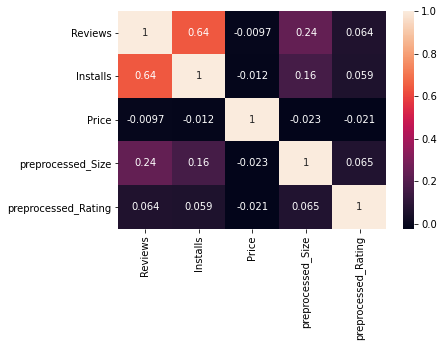

In [543]:
import seaborn as sns
sns.heatmap(df_feature.corr(),annot=True)

### 교육 단계
1. get_dummies (Onehot encoding)
2. standard scaler
3. data split
4. model learning
5. check score

#### 1. Onehot encoding

In [544]:
df_onehot = pd.get_dummies(df_feature, columns=['Installs', 'Content Rating', 'Genres'])
df_onehot.shape

(10841, 150)

In [545]:
df_onehot

,Reviews,Price,preprocessed_Size,preprocessed_Rating,Installs_0.0,Installs_1.0,Installs_5.0,Installs_10.0,Installs_50.0,Installs_100.0,...,Genres_Tools;Education,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Trivia;Education,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
0,159.0,0.0,19.0,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,967.0,0.0,14.0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,87510.0,0.0,8.7,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,215644.0,0.0,25.0,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,967.0,0.0,2.8,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,38.0,0.0,53.0,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10837,4.0,0.0,3.6,5,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10838,3.0,0.0,9.5,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10839,114.0,0.0,NaN,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 2. standard scaler

In [546]:
from sklearn import preprocessing

In [547]:
scaler = preprocessing.StandardScaler()

In [548]:
scaler.fit(df_onehot)

StandardScaler()

In [549]:
X = scaler.transform(df_onehot)
X.shape

(10841, 150)

In [550]:
X

array([[-0.15164949, -0.06441298, -0.11141242, ..., -0.01663742,
        -0.08730135, -0.05179001],
       [-0.15137349, -0.06441298, -0.33277367, ..., -0.01663742,
        -0.08730135, -0.05179001],
       [-0.12181134, -0.06441298, -0.56741659, ..., -0.01663742,
        -0.08730135, -0.05179001],
       ...,
       [-0.15170278, -0.06441298, -0.53199879, ..., -0.01663742,
        -0.08730135, -0.05179001],
       [-0.15166486, -0.06441298,         nan, ..., -0.01663742,
        -0.08730135, -0.05179001],
       [-0.01564646, -0.06441298, -0.11141242, ..., -0.01663742,
        -0.08730135, -0.05179001]])

In [551]:
Y = df['preprocessed_Rating']

In [552]:
Y.shape

(10841,)

#### 3. data split

In [553]:
from sklearn.model_selection import train_test_split

In [554]:
x_train, x_test, y_train, y_test = train_test_split(X,Y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((8130, 150), (2711, 150), (8130,), (2711,))

#### 4. model learning

In [555]:
import xgboost

In [556]:
xgb = xgboost.XGBClassifier()
xgb

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)

In [557]:
xgb.fit(x_train, y_train)

c:\python\python36\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:43:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [558]:
xgb.score(x_train, y_train)

1.0

In [559]:
xgb.score(x_test, y_test)

1.0

#### 5. predict

In [560]:
# df_ = pd.read_csv('')
# df_.head(3)